In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import io
import matplotlib.pyplot as plt
import tensorflow
import tensorflow_datasets

In [4]:
(train_data, test_data), info = tensorflow_datasets.load("imdb_reviews/subwords8k", 
                                                         split=(tensorflow_datasets.Split.TRAIN, tensorflow_datasets.Split.TEST),
                                                         with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDQQV1L/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDQQV1L/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDQQV1L/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
encoder = info.features['text'].encoder

In [5]:
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [10]:
model = tensorflow.keras.Sequential([tensorflow.keras.layers.Embedding(encoder.vocab_size, 16),
                                    tensorflow.keras.layers.GlobalAveragePooling1D(),
                                    tensorflow.keras.layers.Dense(1, activation='sigmoid')])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=20)

Epoch 1/5
2500/2500 [==============================] - 21s 7ms/step - loss: 0.6318 - accuracy: 0.7001 - val_loss: 0.5471 - val_accuracy: 0.7400
Epoch 2/5
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4579 - accuracy: 0.8389 - val_loss: 0.4145 - val_accuracy: 0.8650
Epoch 3/5
2500/2500 [==============================] - 18s 7ms/step - loss: 0.3565 - accuracy: 0.8790 - val_loss: 0.3806 - val_accuracy: 0.8550
Epoch 4/5
2500/2500 [==============================] - 17s 7ms/step - loss: 0.3044 - accuracy: 0.8975 - val_loss: 0.4435 - val_accuracy: 0.8300
Epoch 5/5
2500/2500 [==============================] - 17s 7ms/step - loss: 0.2708 - accuracy: 0.9089 - val_loss: 0.3704 - val_accuracy: 0.8750


In [13]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

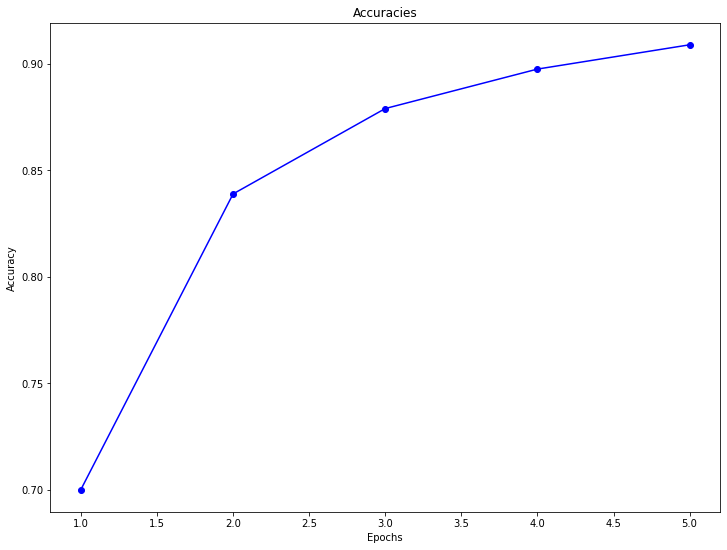

In [15]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, acc, 'b', label='Validation Accuracy')
plt.title("Accuracies")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()